<a href="https://colab.research.google.com/github/LucaPredieri/MNISTAutoencoder/blob/main/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()
x_train[1]

11490434/11490434 [==============================] - 0s 0us/step


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
x_train_1 = x_train[1].reshape(1, 784)
x_train_1

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253,
        159,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238,
        252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

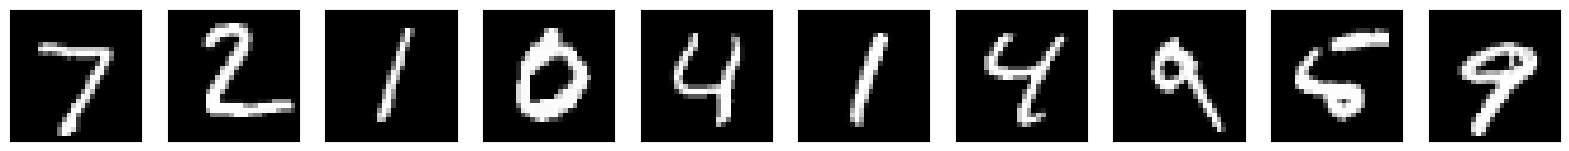

In [ ]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [ ]:
x_train = x_train.reshape((len(x_train), 784))
x_test = x_test.reshape((len(x_test), 784))
x_train.shape

(60000, 784)

In [ ]:
# Normalize
#x_train = x_train.astype('float32') / 255.
#x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


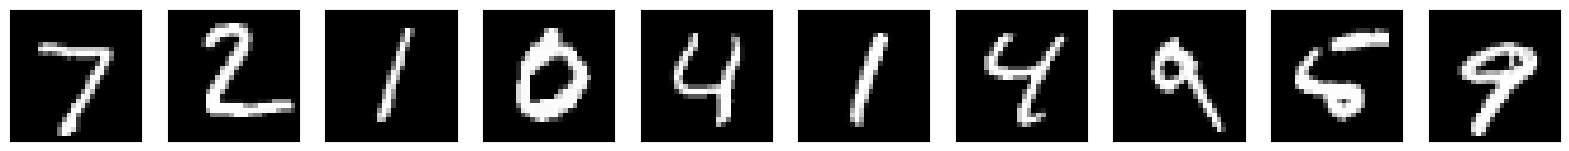

In [ ]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

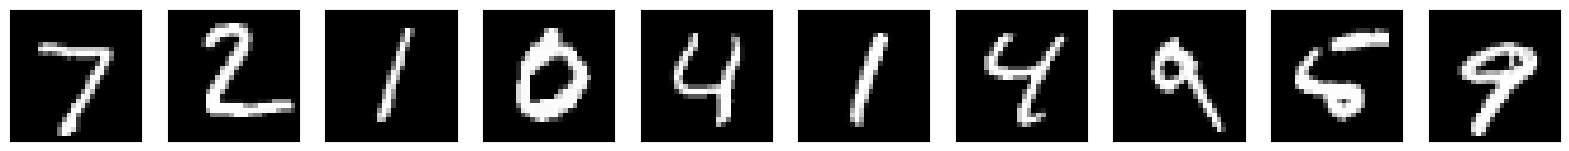

In [ ]:
import matplotlib.pyplot as plt

def print_img(df):
    n = 10  # how many digits we will display
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(df[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    
print_img(x_test)

In [ ]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

# The encoding process
input_img = Input(shape=(28, 28, 1))  

x = Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', padding='same')(input_img)
# kernel_size: Specifying the height and width of the 2D convolution window.
    
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)
x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x) 
x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D(pool_size = (2, 2), padding='same')(x)

# padding is a hyper-arameter for either 'valid' or 'same'. 
# "valid" means "no padding". 
# "same" results in padding the input such that the output has the same length as the original input.

In [ ]:
# The decoding process
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format
print(x_train.shape)


(60000, 28, 28, 1)


In [ ]:
#tensorboard --logdir=/tmp/autoencoder

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=1,
                shuffle=True,
                validation_data=(x_test, x_test)
                # callbacks=[TensorBoard(log_dir='/tmp/autoencoder')]
               )

Epoch 1/10
60000/60000 [==============================] - 303s 5ms/step - loss: 0.3628 - val_loss: 0.2767
Epoch 2/10
60000/60000 [==============================] - 302s 5ms/step - loss: 0.2494 - val_loss: 0.2334
Epoch 3/10
60000/60000 [==============================] - 299s 5ms/step - loss: 0.2247 - val_loss: 0.2175
Epoch 4/10
60000/60000 [==============================] - 304s 5ms/step - loss: 0.2127 - val_loss: 0.2082
Epoch 5/10
60000/60000 [==============================] - 306s 5ms/step - loss: 0.2054 - val_loss: 0.2020
Epoch 6/10
60000/60000 [==============================] - 306s 5ms/step - loss: 0.1998 - val_loss: 0.1969
Epoch 7/10
60000/60000 [==============================] - 302s 5ms/step - loss: 0.1953 - val_loss: 0.1926
Epoch 8/10
60000/60000 [==============================] - 303s 5ms/step - loss: 0.1913 - val_loss: 0.1889
Epoch 9/10
60000/60000 [==============================] - 297s 5ms/step - loss: 0.1878 - val_loss: 0.1855
Epoch 10/10
60000/60000 [=====================

313/313 [==============================] - 5s 14ms/step


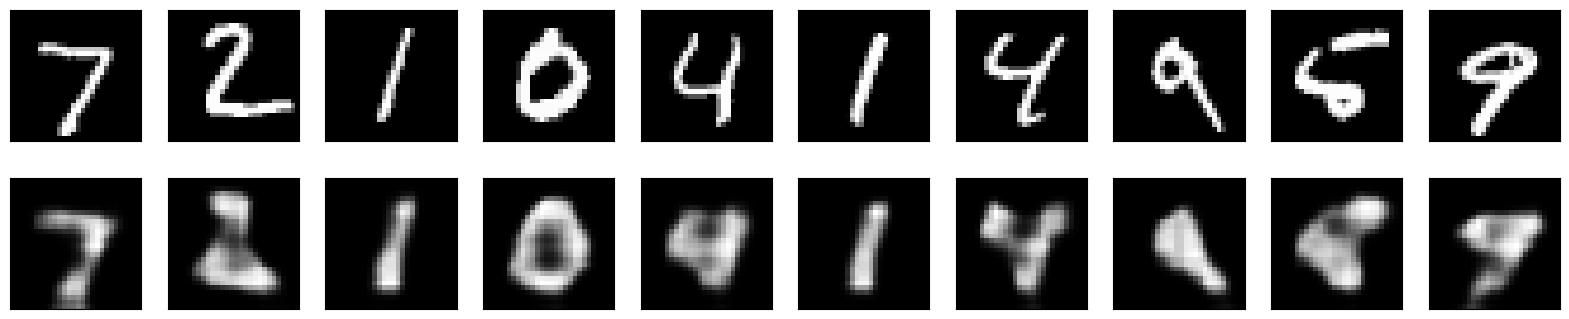

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
noise_factor = 0.4
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

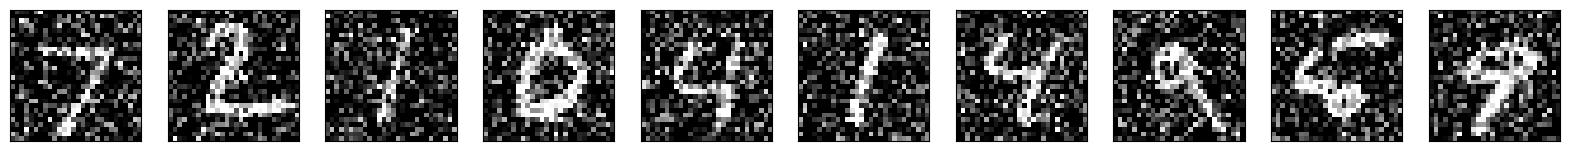

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=1,
                shuffle=True,
                validation_data=(x_test_noisy, x_test)
               )

Epoch 1/100
60000/60000 [==============================] - 304s 5ms/step - loss: 0.2175 - val_loss: 0.2587
Epoch 2/100
60000/60000 [==============================] - 300s 5ms/step - loss: 0.2111 - val_loss: 0.2593
Epoch 3/100
60000/60000 [==============================] - 302s 5ms/step - loss: 0.2075 - val_loss: 0.2574
Epoch 4/100
60000/60000 [==============================] - 300s 5ms/step - loss: 0.2045 - val_loss: 0.2559
Epoch 5/100
60000/60000 [==============================] - 300s 5ms/step - loss: 0.2018 - val_loss: 0.2520
Epoch 6/100
60000/60000 [==============================] - 303s 5ms/step - loss: 0.1995 - val_loss: 0.2494
Epoch 7/100
60000/60000 [==============================] - 305s 5ms/step - loss: 0.1975 - val_loss: 0.2459
Epoch 8/100
60000/60000 [==============================] - 304s 5ms/step - loss: 0.1956 - val_loss: 0.2430
Epoch 9/100
60000/60000 [==============================] - 297s 5ms/step - loss: 0.1939 - val_loss: 0.2396
Epoch 10/100
60000/60000 [===========

In [3]:
decoded_imgs = autoencoder.predict(x_test)

n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

NameError: ignored

In [ ]:
import numpy as np
from keras.datasets import mnist

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Save the dataset as an .npz file
np.savez('mnist_data.npz', x_train=x_train, x_test=x_test)

# Load the dataset from the .npz file
data = np.load('mnist_data.npz')
x_train = data['x_train']
x_test = data['x_test']

# Use the dataset as before
# ...

11490434/11490434 [==============================] - 1s 0us/step
